'''
Context of Data 
 Company - UK-based and registered non-store online retail 
 Products for selling - Mainly all-occasion gifts 
 Customers - Most are wholesalers (local or international) 
 Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year) 

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

In [2]:
ecommerce_df = pd.read_csv(r'Ecommerce - UK Retailer.csv')

In [3]:
ecommerce_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

'''
1. Perform Basic EDA 
a. Boxplot – All Numeric Variables 
b. Histogram – All Numeric Variables 
c. Distribution Plot – All Numeric Variables 
d. Aggregation for all numerical Columns 
e. Unique Values across all columns 
f. Duplicate values across all columns 
g. Correlation – Heatmap - All Numeric Variables 
h. Regression Plot - All Numeric Variables 
i. Bar Plot – Every Categorical Variable vs every Numerical Variable 
j. Pair plot - All Numeric Variables 
k. Line chart to show the trend of data - All Numeric/Date Variables 
l. Plot the skewness - All Numeric Variables 
'''

# Performing Basic EDA


In [4]:
ecommerce_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
ecommerce_df.shape

(541909, 8)

In [6]:
#Remove negative values in colmn 'Quantity'
ecommerce_df_new = ecommerce_df[(ecommerce_df['Quantity'] >= 0)]

In [7]:
ecommerce_df_new.shape

(531285, 8)

### a. Boxplot – All Numeric Variables 

C:\Users\Piyush Anand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


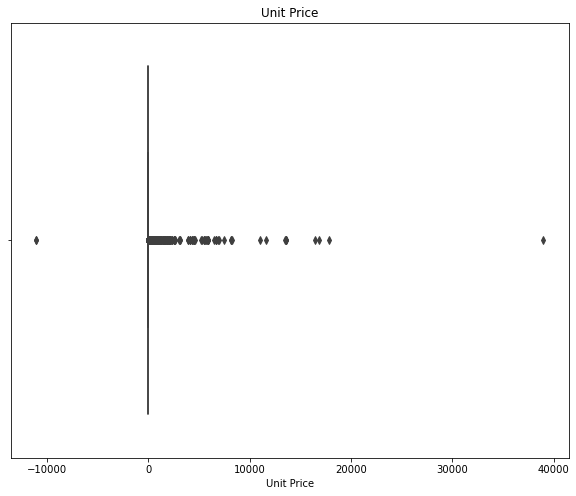

In [8]:
# Box Plot
plt.subplots(figsize=(10,8))
sns.boxplot(ecommerce_df.UnitPrice)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.show()

### b. Histogram – All Numeric Variables 

#### - Hour Split is downwards -

In [9]:
#Add the columns - Month, Day and Hour for the invoice
ecommerce_df_new['InvoiceDate'] = ecommerce_df_new['InvoiceDate'].astype('datetime64[ns]')
ecommerce_df_new['Year'] = ecommerce_df_new.InvoiceDate.dt.year
ecommerce_df_new['Month'] = ecommerce_df_new.InvoiceDate.dt.month
ecommerce_df_new['year_month']= ecommerce_df_new.InvoiceDate.map(lambda x: 100*x.year + x.month)
ecommerce_df_new['Day']=(ecommerce_df_new.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
ecommerce_df_new['Hour'] = ecommerce_df_new.InvoiceDate.dt.hour
ecommerce_df_new['Revenue'] = ecommerce_df_new['Quantity'] * ecommerce_df_new['UnitPrice']
ecommerce_df_new.head()

<ipython-input-9-519f789d0eb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_df_new['InvoiceDate'] = ecommerce_df_new['InvoiceDate'].astype('datetime64[ns]')
<ipython-input-9-519f789d0eb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_df_new['Year'] = ecommerce_df_new.InvoiceDate.dt.year
<ipython-input-9-519f789d0eb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year  Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010     12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010     12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   

   year_month  Day  Hour  Revenue  
0      201012    3     8    15.30  
1      201012    3     8    20.34  
2      201012    3     8    22.00  
3      201012    3     8    20.34  
4      201012    3     8    20.34

In [11]:
ecommerce_df_new.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Year                    int64
Month                   int64
year_month              int64
Day                     int64
Hour                    int64
Revenue               float64
dtype: object

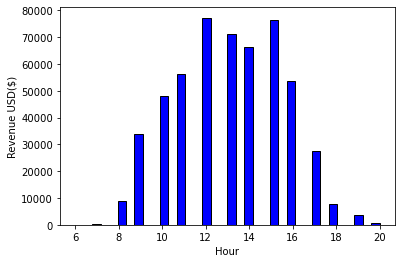

In [13]:
# Histogram (graphical representation of numerical data distribution)
plt.hist(ecommerce_df_new['Hour'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Hour')
plt.ylabel('Revenue USD($)')
plt.show()

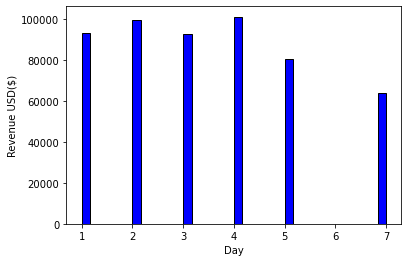

In [14]:
plt.hist(ecommerce_df_new['Day'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Day')
plt.ylabel('Revenue USD($)')
plt.show()

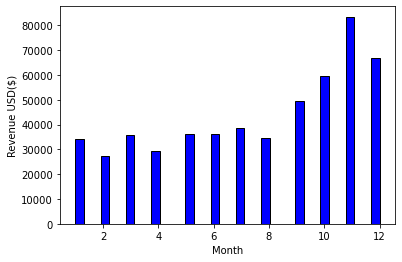

In [15]:
plt.hist(ecommerce_df_new['Month'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
plt.xlabel('Month')
plt.ylabel('Revenue USD($)')
plt.show()

### c. Distribution Plot – All Numeric Variables 

C:\Users\Piyush Anand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


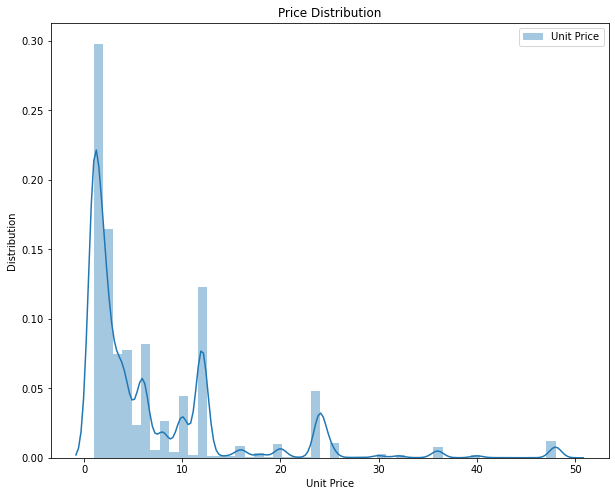

In [16]:
# distribition plot (Skewed +ve)
# If a data set has a positive skew, 
# but the mean of the returns is negative, it means that overall performance is negative
# but here mean is positive hence performance is considerd as to be good
plt.subplots(figsize=(10,8))
sns.distplot(ecommerce_df_new.Quantity[ecommerce_df_new.Quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Distribution')
plt.title('Price Distribution')
plt.show()

### d. Aggregation for all numerical Columns 

In [17]:
#Aggregation for all numerical Columns
ecommerce_df_new.describe()

Quantity      UnitPrice     CustomerID           Year  \
count  531285.000000  531285.000000  397924.000000  531285.000000   
mean       10.655262       3.857296   15294.315171    2010.921543   
std       156.830323      41.810047    1713.169877       0.268890   
min         1.000000  -11062.060000   12346.000000    2010.000000   
25%         1.000000       1.250000   13969.000000    2011.000000   
50%         3.000000       2.080000   15159.000000    2011.000000   
75%        10.000000       4.130000   16795.000000    2011.000000   
max     80995.000000   13541.330000   18287.000000    2011.000000   

               Month     year_month            Day           Hour  \
count  531285.000000  531285.000000  531285.000000  531285.000000   
mean        7.560244  201099.714549       3.435561      13.076259   
std         3.508717      25.800406       1.849816       2.438303   
min         1.000000  201012.000000       1.000000       6.000000   
25%         5.000000  201103.000000       2.000000      11.000000   
50%         8.000000  201107.000000       3.000000      13.000000   
75%        11.000000  201110.000000       5.000000      15.000000   
max        12.000000  201112.000000       7.000000      20.000000   

            Revenue  
count  531285.00000  
mean       20.03550  
std       270.91237  
min    -11062.06000  
25%         3.75000  
50%         9.90000  
75%        17.70000  
max    168469.60000

### e. Unique Values across all columns

In [18]:
#Unique values across colmn
#.ravel(): as below
#returns contiguous flattened array(1D array with all the input-array elements and with the same type as it)
pd.unique(ecommerce_df_new[['Country','Description','StockCode','Country']].values.ravel())

array(['United Kingdom', 'WHITE HANGING HEART T-LIGHT HOLDER', '85123A',
       ..., 'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE', '23843'], dtype=object)

### f. Duplicate values across all columns 

In [19]:
#Remove duplicate rows
ecommerce_df.drop_duplicates()

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[536641 rows x 8 columns]

### g. Correlation – Heatmap - All Numeric Variables 

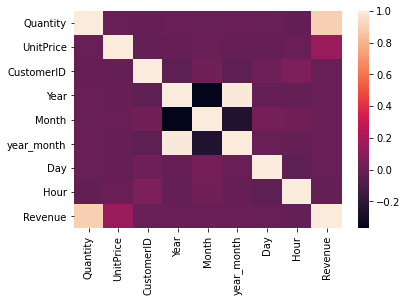

In [20]:
# Heat Map
sns.heatmap(ecommerce_df_new.corr())
plt.show()

### h. Regression Plot - All Numeric Variables 

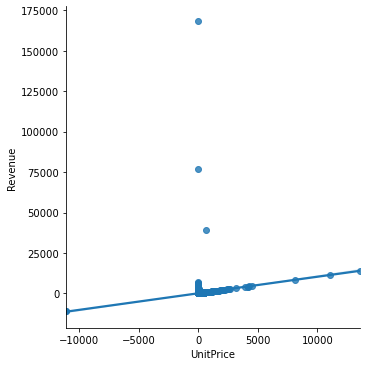

In [21]:
sns.lmplot(x='UnitPrice',y='Revenue',data=ecommerce_df_new)

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable 

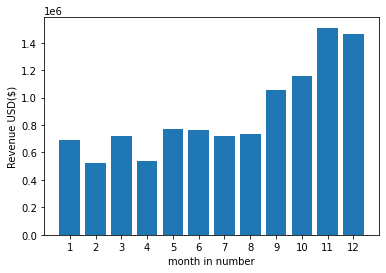

In [22]:
# Bar Plot 
result=ecommerce_df_new.groupby('Month').sum()
month=range(1,13)
plt.bar(month,result['Revenue'])
plt.xticks(month)
plt.xlabel('month in number')
plt.ylabel('Revenue USD($)')
plt.show()

### j. Pair plot - All Numeric Variables 

In [ ]:
# Pair plot allows us to see both distribution of single variables and relationships between two variables.
sns.pairplot(ecommerce_df)
plt.show()

### k. Line chart to show the trend of data - All Numeric/Date Variables

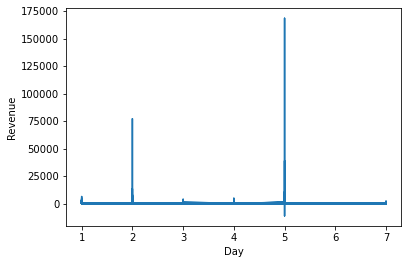

In [24]:
#Line chart to show the trend of data 

plt.plot(ecommerce_df_new['Day'],ecommerce_df_new['Revenue'])
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()

## 1. Plot the skewness - All Numeric Variables 

In [25]:
# skewness 
ecommerce_df_new.skew(axis=0,skipna=True)

Quantity      460.130967
UnitPrice      60.552895
CustomerID      0.025776
Year           -3.135448
Month          -0.417780
year_month     -3.047498
Day             0.466762
Hour            0.000429
Revenue       502.218534
dtype: float64

### 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 

#### Since there is no missing value in the numerical coloumn we cannot replace the categorical columns data with Mean, Median or Mode

In [26]:
ecommerce_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 3. Remove duplicate rows

In [27]:
#Remove duplicate rows
ecommerce_df.drop_duplicates()

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[536641 rows x 8 columns]

### 4. Remove rows which have negative values in Quantity column 

In [28]:
#Remove negative values in colmn 'Quantity'
ecommerce_df_new = ecommerce_df[(ecommerce_df['Quantity'] >= 0)]

In [29]:
ecommerce_df_new.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [30]:
ecommerce_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


### 5. Add the columns - Month, Day and Hour for the invoice 

In [31]:
#Add the columns - Month, Day and Hour for the invoice
ecommerce_df_new['InvoiceDate'] = ecommerce_df_new['InvoiceDate'].astype('datetime64[ns]')
ecommerce_df_new['Year'] = ecommerce_df_new.InvoiceDate.dt.year
ecommerce_df_new['Month'] = ecommerce_df_new.InvoiceDate.dt.month
ecommerce_df_new['year_month']= ecommerce_df_new.InvoiceDate.map(lambda x: 100*x.year + x.month)
ecommerce_df_new['Day']=(ecommerce_df_new.InvoiceDate.dt.dayofweek)+1 # +1 to make Monday=1.....until Sunday=7
ecommerce_df_new['Hour'] = ecommerce_df_new.InvoiceDate.dt.hour
ecommerce_df_new['Revenue'] = ecommerce_df_new['Quantity'] * ecommerce_df_new['UnitPrice']
ecommerce_df_new.head()

<ipython-input-31-519f789d0eb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_df_new['InvoiceDate'] = ecommerce_df_new['InvoiceDate'].astype('datetime64[ns]')
<ipython-input-31-519f789d0eb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_df_new['Year'] = ecommerce_df_new.InvoiceDate.dt.year
<ipython-input-31-519f789d0eb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year  Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010     12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010     12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   

   year_month  Day  Hour  Revenue  
0      201012    3     8    15.30  
1      201012    3     8    20.34  
2      201012    3     8    22.00  
3      201012    3     8    20.34  
4      201012    3     8    20.34

### 6. How many orders made by the customers?

In [32]:
index = pd.Index(ecommerce_df_new['Quantity'])
print(f"Total orders made by the customers = {index.value_counts().sum()}")

Total orders made by the customers = 531285


### 7. TOP 5 customers with higher number of orders 

In [33]:
total_order=ecommerce_df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head(10)
print(total_order)

   CustomerID         Country  InvoiceNo
0     12346.0  United Kingdom          1
1     12347.0         Iceland        182
2     12348.0         Finland         31
3     12349.0           Italy         73
4     12350.0          Norway         17
5     12352.0          Norway         85
6     12353.0         Bahrain          4
7     12354.0           Spain         58
8     12355.0         Bahrain         13
9     12356.0        Portugal         59


In [34]:
total_order.sort_values(by='InvoiceNo', ascending=False).head()

CustomerID   Country  InvoiceNo
1     12347.0   Iceland        182
5     12352.0    Norway         85
3     12349.0     Italy         73
9     12356.0  Portugal         59
7     12354.0     Spain         58

In [35]:
total_order.sort_values(by='InvoiceNo', ascending=False).head()

CustomerID   Country  InvoiceNo
1     12347.0   Iceland        182
5     12352.0    Norway         85
3     12349.0     Italy         73
9     12356.0  Portugal         59
7     12354.0     Spain         58

### 8. How much money spent by the customers? 

In [36]:
ecommerce_df_new['Revenue'].sum()

10644560.424

In [37]:
money_spent = ecommerce_df_new.groupby(by=['CustomerID','Country'],as_index=False)['Revenue'].sum()
print(money_spent)

      CustomerID         Country   Revenue
0        12346.0  United Kingdom  77183.60
1        12347.0         Iceland   4310.00
2        12348.0         Finland   1797.24
3        12349.0           Italy   1757.55
4        12350.0          Norway    334.40
...          ...             ...       ...
4342     18280.0  United Kingdom    180.60
4343     18281.0  United Kingdom     80.82
4344     18282.0  United Kingdom    178.05
4345     18283.0  United Kingdom   2094.88
4346     18287.0  United Kingdom   1837.28

[4347 rows x 3 columns]


### 9. TOP 5 customers with highest money spent

In [38]:
money_spent.sort_values(by=['Revenue'],ascending=False).head()

CustomerID         Country    Revenue
1698     14646.0     Netherlands  280206.02
4210     18102.0  United Kingdom  259657.30
3737     17450.0  United Kingdom  194550.79
3017     16446.0  United Kingdom  168472.50
1888     14911.0            EIRE  143825.06

### 10. How many orders per month? 

In [39]:
Order_per_month = ecommerce_df_new.groupby('InvoiceNo')['year_month'].unique().value_counts()
Order_per_month

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[201111]    2884
[201110]    2129
[201109]    1896
[201105]    1731
[201012]    1629
[201106]    1576
[201107]    1540
[201103]    1531
[201108]    1409
[201104]    1318
[201102]    1126
[201101]    1120
[201112]     839
Name: year_month, dtype: int64

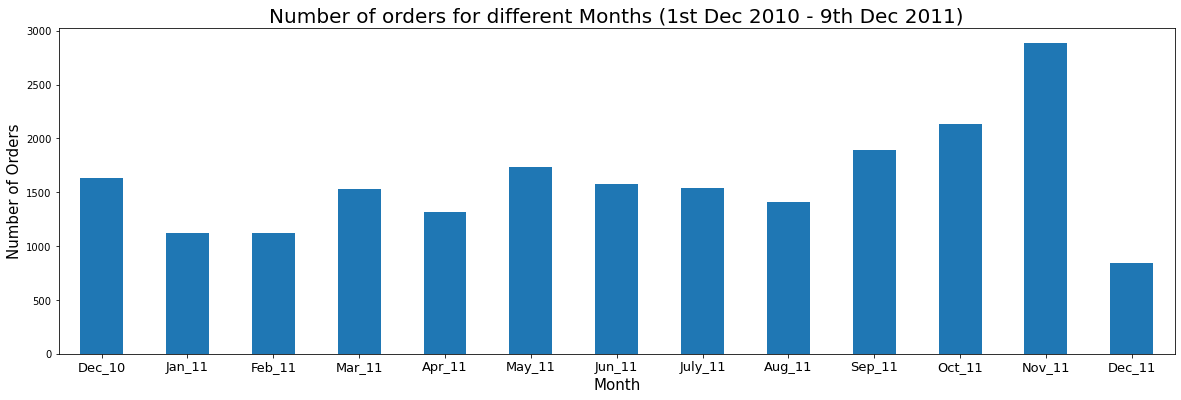

In [40]:
yum = ecommerce_df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(20,6))
yum.set_xlabel('Month',fontsize=15)
yum.set_ylabel('Number of Orders',fontsize=15)
yum.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=20)
yum.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

### 11. How many orders per day? 

In [41]:
Order_per_day = ecommerce_df_new.groupby('InvoiceNo')['Day'].unique().value_counts()
Order_per_day

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[4]    4408
[3]    3865
[2]    3717
[5]    3294
[1]    3237
[7]    2207
Name: Day, dtype: int64

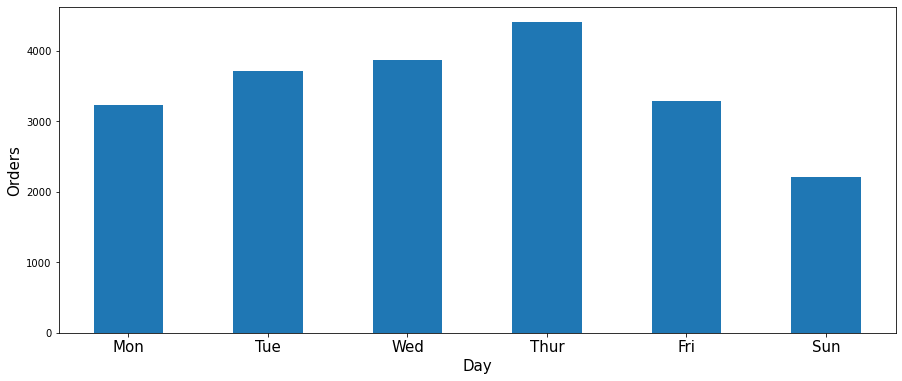

In [32]:
ax = ecommerce_df_new.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Orders',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

###  12. How many orders per hour? 

In [44]:
ecommerce_df_new.groupby('InvoiceNo')['Hour'].unique().value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[12]        3322
[13]        2818
[14]        2557
[15]        2474
[11]        2472
[10]        2431
[9]         1538
[16]        1406
[17]         738
[8]          568
[18]         209
[19]         146
[7]           29
[20]          18
[11, 12]       1
[6]            1
Name: Hour, dtype: int64

ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of ticklabels (15).

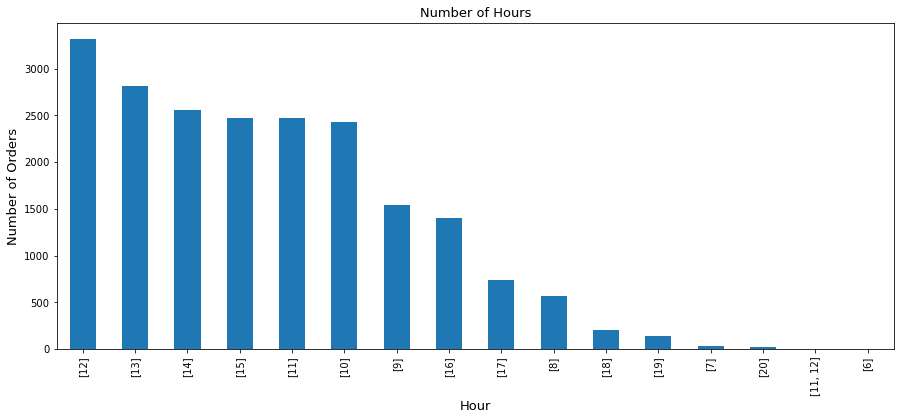

In [46]:
ax = ecommerce_df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=13)
ax.set_ylabel('Number of Orders',fontsize=13)
ax.set_title('Number of Hours',fontsize=13)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=13)
plt.show()

### 13. How many orders for each country? 

In [ ]:
ecommerce_df_new.groupby('Country')['InvoiceNo'].count()

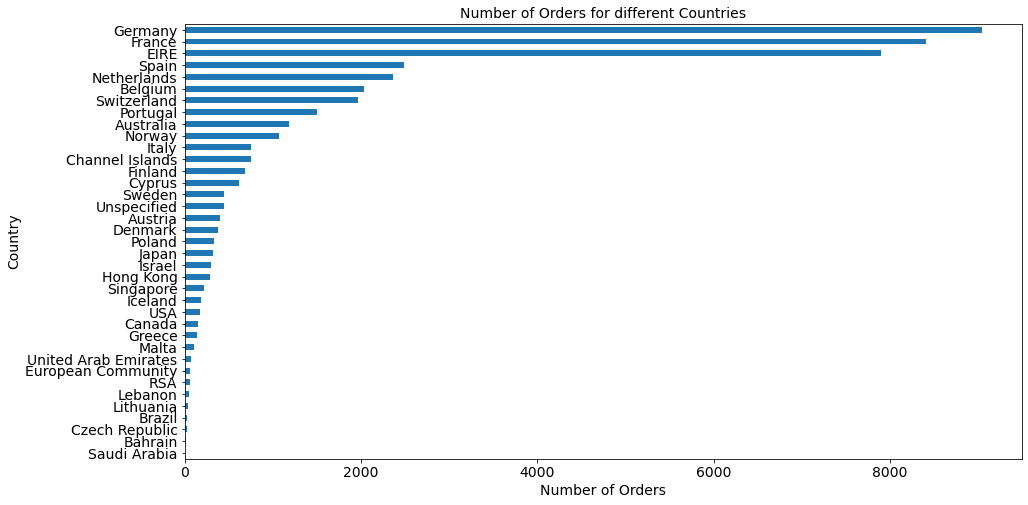

In [8]:
group_country_orders = ecommerce_df_new.groupby('Country')['InvoiceNo'].count().sort_values()
del group_country_orders['United Kingdom']

# number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

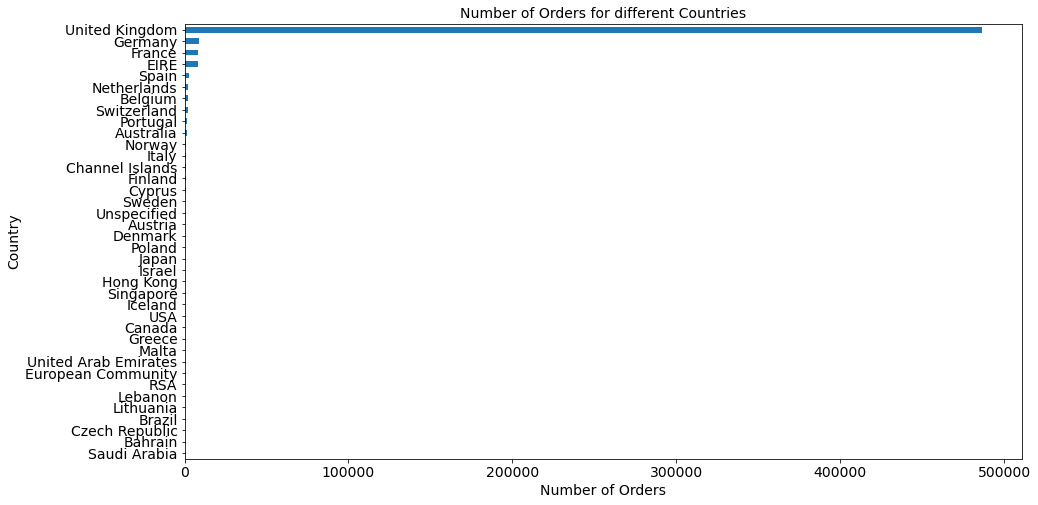

In [9]:
group_country_orders = ecommerce_df_new.groupby('Country')['InvoiceNo'].count().sort_values()
#del group_country_orders['United Kingdom']

# number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=14, color=color[0])
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Number of Orders for different Countries', fontsize=14)
plt.show()

###  14. Orders trend across months

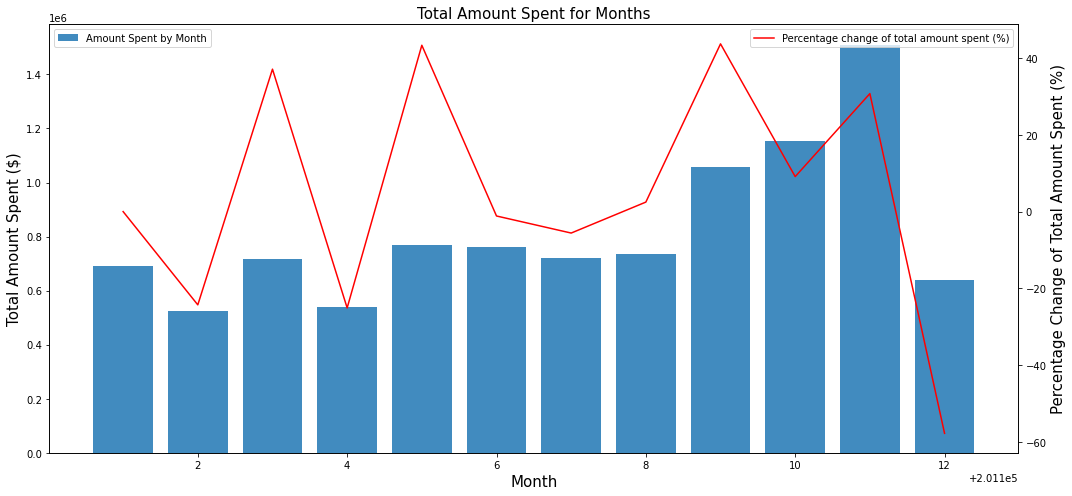

In [10]:
# trend plot
fig = plt.figure(figsize=(15, 7))
x1 = fig.add_subplot(111)

x1.set_xlabel('Month',fontsize=15)
x1.set_ylabel('Total Amount Spent ($)',fontsize=15)
x1.set_title('Total Amount Spent for Months',fontsize=15)

x1.bar(ecommerce_df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:],
        ecommerce_df_new.groupby(by=['year_month'])['Revenue'].sum()[1:],
        alpha=0.85,#If you want to make the graph plot more transparent, then you can make alpha less than 1, such as 0.5 or 0.25.
        label='Amount Spent by Month')

x2 = x1.twinx()# tread line

x2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)

#pct_change()Percentage change between the current and a prior element.
x2.plot(ecommerce_df_new.groupby(by=['year_month'])['Revenue'].sum().index.tolist()[1:], 
         ecommerce_df_new.groupby(by=['year_month'])['Revenue'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

x1.legend(loc='upper left')
x2.legend(loc='upper right')

fig.tight_layout()
plt.show()

### 15. How much money spent by each country

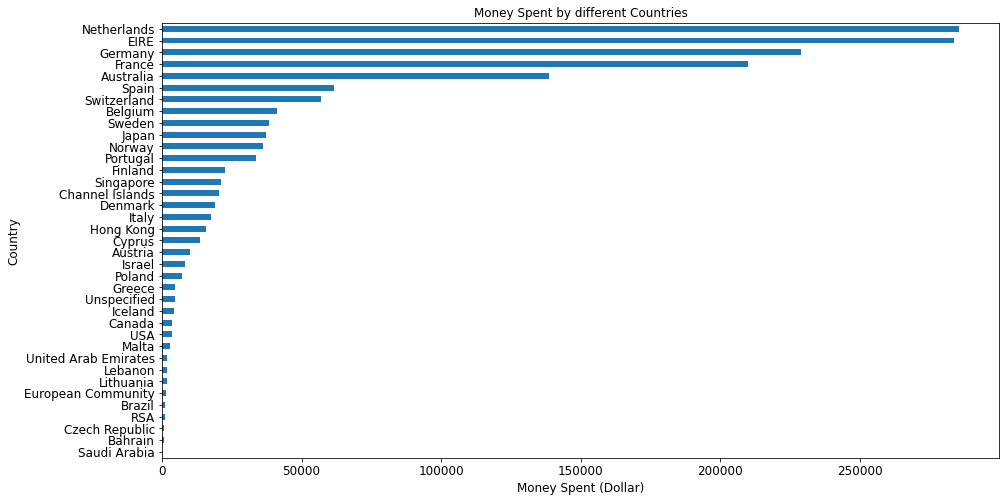

In [11]:
group_country_amount_spent = ecommerce_df_new.groupby('Country')['Revenue'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

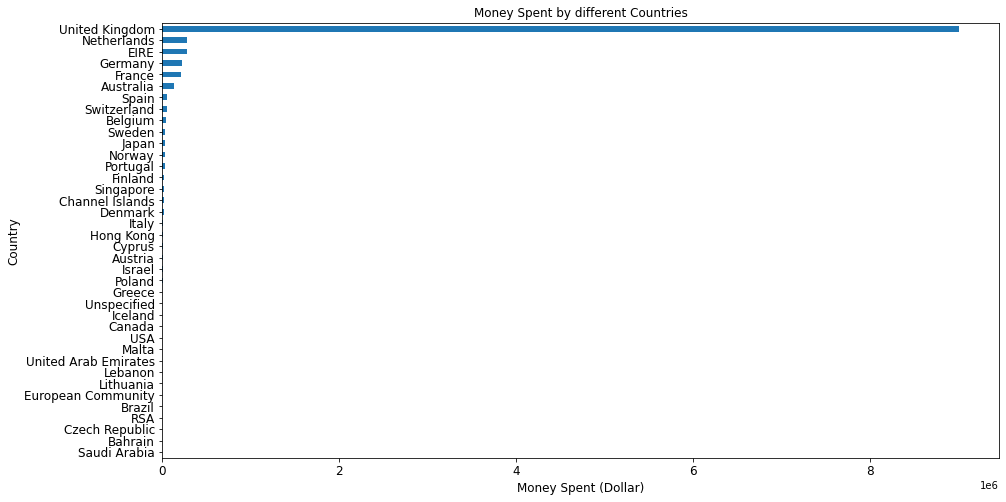

In [12]:
group_country_amount_spent = ecommerce_df_new.groupby('Country')['Revenue'].sum().sort_values()
#del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()